# SVM on loan prediction dataset

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\spoor\\Downloads\\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Load the dataset and study applicant attributes such as:  
Applicant income  
Loan amount  
Credit history  
Employment status  
Identify features that may influence loan approval.

In [8]:
#data preprocessing
cat_cols = ['Gender','Married','Dependents','Self_Employed','Credit_History']

for col in cat_cols:
    df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [7]:
num_cols = ['LoanAmount','Loan_Amount_Term']

for col in num_cols:
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


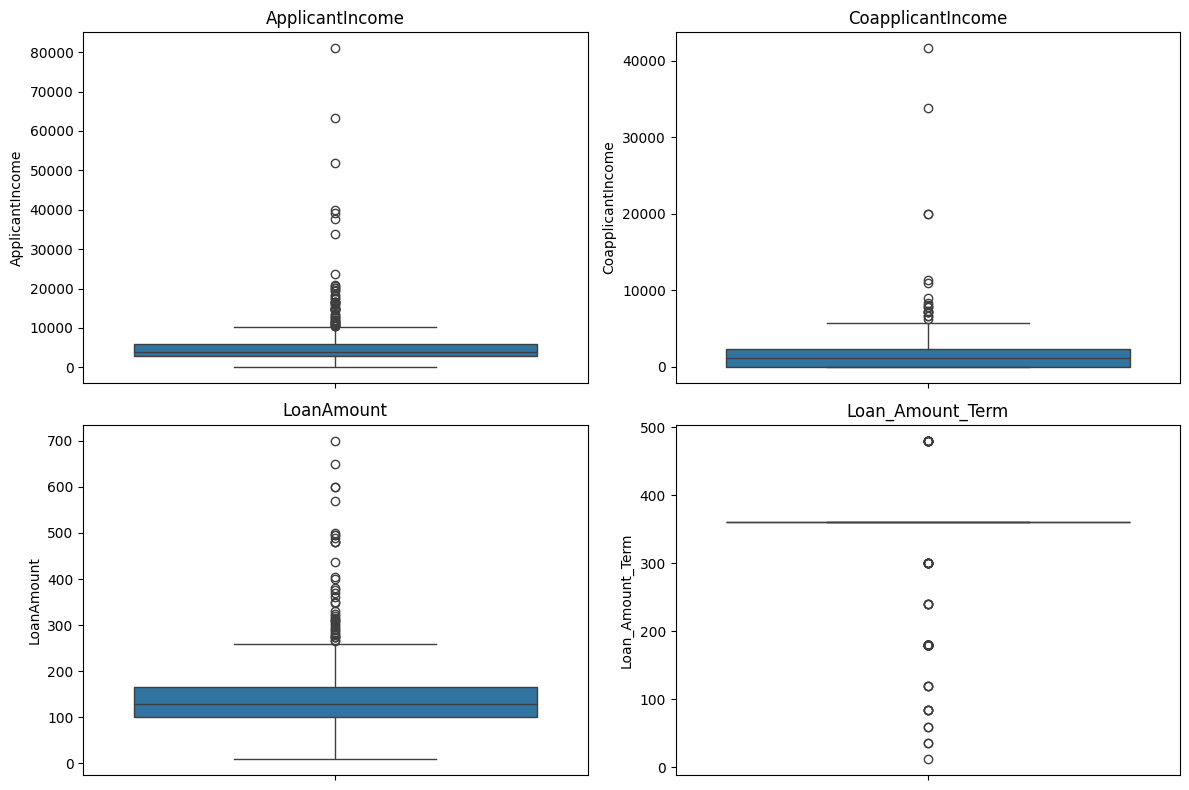

In [11]:
num_col = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term'
]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
for i, col in enumerate(num_col, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [12]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)][col]

for col in num_cols:
    print(col, "outliers:", len(detect_outliers_iqr(df, col)))


LoanAmount outliers: 41
Loan_Amount_Term outliers: 88


In [13]:
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])
# Do NOT touch Loan_Amount_Term


In [17]:
df.drop('Loan_ID', axis=1, inplace=True)


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ['Gender','Married','Education','Self_Employed','Property_Area']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [19]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


In [20]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})


Build three different SVM models using:  
Linear kernel  
Polynomial kernel  
RBF kernel  
Train each model and evaluate performance using:  
Accuracy  
Precision / Recall  
Compare results and identify:  
Which kernel handles non-linear patterns better  
Which kernel generalizes best on unseen data

In [21]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from sklearn.svm import SVC
# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [25]:
from sklearn.metrics import *
acc=accuracy_score(y_test,y_pred_linear)
acc

0.8536585365853658

In [26]:
cm=confusion_matrix(y_test,y_pred_linear)
cm

array([[21, 17],
       [ 1, 84]])

In [27]:
# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

In [28]:
acc=accuracy_score(y_test,y_pred_poly)
acc

0.8292682926829268

In [29]:
cm=confusion_matrix(y_test,y_pred_poly)
cm

array([[21, 17],
       [ 4, 81]])

In [30]:
# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale' )
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [31]:
acc=accuracy_score(y_test,y_pred_rbf)
acc

0.8536585365853658

In [32]:
cm=confusion_matrix(y_test,y_pred_rbf)
cm

array([[21, 17],
       [ 1, 84]])